In [223]:
# Include library

# Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. 
# or SIMPLE to work with ML model
from sklearn import ensemble, model_selection, metrics
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# To work with arrays
import numpy as np

import pandas as pd

# XGBoost, which stands for Extreme Gradient Boosting, 
# is a scalable, distributed gradient-boosted decision tree (GBDT) 
# machine learning library. 
# It provides parallel tree boosting and is the leading machine learning library for regression,
# classification, and ranking problems.
# or SIMPLE to work with ML model
import xgboost as xgb

# For data visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Operation system
import os 

# Mathematics libary from python
import math

# To work with images
from IPython.display import Image
from IPython.core.display import HTML

In [179]:
class FileManagerServices:
    

current_directory = str(os.getcwd())
solution_directory = current_directory[:current_directory.find("Result")]
project_directory = current_directory[:current_directory.find("Code")]
image_directory = "{0}/{1}".format(project_directory, "Images")

scanner_directory = os.scandir(image_directory)
images = [file.name if file.is_dir() or file.is_file() else "" for file in scanner_directory]

img_mse = images[0]
img_rmse = images[1]

print("Current directory: {0}".format(current_directory))
print("Solution directory: {0}".format(solution_directory))
print("Poroject directory: {0}".format(project_directory))
print("Image(s) directory: {0}".format(image_directory))
print("Image(s) in the directory: {0}".format(len(images)))
print("Image(s) in the directory Mean Square Error: {0}".format(img_mse))
print("Image(s) in the directory Root Mean Square Error: {0}".format(img_rmse))
print("Image in directory: {0}/{1}".format(image_directory, img_mse))

Current directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction/Result/Models/model_v1/Code
Solution directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction/
Poroject directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction/Result/Models/model_v1/
Image(s) directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction/Result/Models/model_v1//Images
Image(s) in the directory: 2
Image(s) in the directory Mean Square Error: mse.png
Image(s) in the directory Root Mean Square Error: rmse.png
Image in directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction/Result/Models/model_v1//Images/mse.png


In [180]:
# Note: Can be automated and be exported from web site by written special service to get done web scraping
dataset = pd.read_csv("{0}/{1}/{2}".format(project_directory, "Data", "dataset_v1.csv"))

Save directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/data.jpeg


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/data.jpeg'

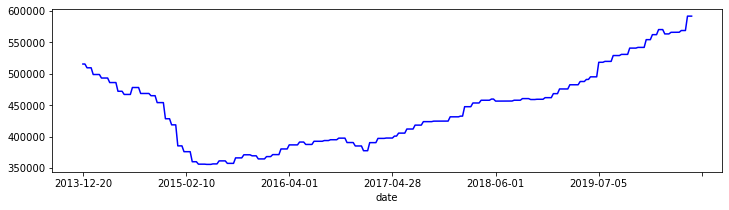

In [225]:
# To draw plot
fig, ax = plt.subplots(figsize=(12,3))
dataset.set_index('date')['res_res'].plot(ax=ax, color="b")

print("Save directory: {0}/{1}/data.jpeg".format(solution_directory, "Bin"))
fig.savefig("{0}/{1}/data.jpeg".format(solution_directory, "Bin"))

In [182]:
# display dataset
dataset

,date,rate,eur_rub,jpy_rub,idl_vol,bas_dep,req_res,act_bal,org_num,rep_vol,sal_vol,res_gol,kop_dep,res_res
0,2013-12-20,5.50,45.0628,31.7234,355.70,34523683.0,402.3,1242.059677,926.0,2719845.0,-581.8,40640.0,104748.56,515590.0
1,2013-12-25,5.50,44.6520,31.3193,206.08,34523683.0,402.3,1242.059677,926.0,2719845.0,-1416.8,40640.0,97507.40,515590.0
2,2014-01-10,5.50,45.0672,31.6060,196.31,35277417.0,404.8,1067.077419,919.0,3139666.0,-793.0,39990.0,249552.32,509595.0
3,2014-01-15,5.50,45.4139,32.1410,207.05,35277417.0,404.8,1067.077419,919.0,3139666.0,-89.1,39990.0,136797.77,509595.0
4,2014-01-28,5.50,47.4962,33.8248,175.63,35277417.0,404.8,1067.077419,919.0,3139666.0,-287.6,39990.0,114920.59,509595.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2020-07-15,4.50,80.6230,66.2977,82.70,67667780.0,646.7,2589.600000,424.0,5105.0,-266.9,130790.0,1439472.27,568872.0
292,2020-07-28,4.25,83.7759,67.8692,216.56,67667780.0,646.7,2589.600000,424.0,5105.0,238.2,130790.0,1570877.45,568872.0
293,2020-08-05,4.25,86.5011,69.2498,342.65,68676951.0,659.2,2631.700000,419.0,5124.0,1056.4,144322.0,2756395.28,591753.0
294,2020-08-20,4.25,87.4037,69.4441,50.91,68676951.0,659.2,2631.700000,419.0,5124.0,133.4,144322.0,1806529.19,591753.0


Целевая переменная - ключевая ставка ЦБ, обучающая выборка - всё, кроме даты и ключевой ставки

In [6]:
# Select Y as rate from dataset
Y_axis = dataset['rate']
# Select X as time from dataset. : first rows and 2: is columns 
X_axis = dataset.iloc[:, 2:]

In [7]:
# Show X (everything except datetime and rate) 
#X_axis
#Y_axis

Формируем обучающие и тестовые выборки (sample) без перемешивания (без заглядывания в будущее), берём первые `90%` данных

In [237]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_axis, Y_axis, test_size=0.10, shuffle=True)

In [266]:
#count and show percents
# len(Y_axis) is 100%
# len(Y_train) is X1%
# len(Y_test) is X2%
x1 = round(len(Y_train) * 100 / len(Y_axis), 2) 
x2 = round(len(Y_test) * 100 / len(Y_axis), 2) 

print("Traning Y sample size, or 100%: {0}".format(len(Y_axis)))
print("Traning Y train sample size, or {0}%: {1}".format(x1, len(Y_train)))
print("Traning Y test sample size, or {0}%: {1}".format(x2, len(Y_test)))

Traning Y sample size, or 100%: 296
Traning Y train sample size, or 89.86%: 266
Traning Y test sample size, or 10.14%: 30


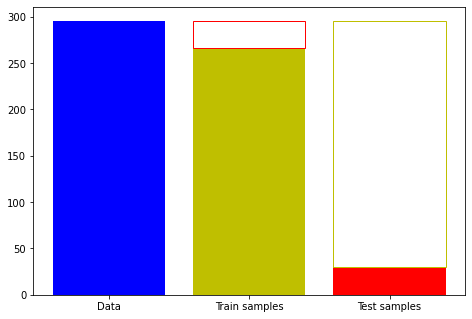

Traning Y sample size, or 100%: 296
Traning Y train sample size, or 90%: 266
Traning Y test sample size, or 10%: 30
Save directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/smaple.png


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/smaple.png'

In [239]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ["Data", "Train samples", "Test samples"]
color = ["b", "y", "r"]
sizes = [Y_axis.count(), Y_train.count(), Y_test.count()]
ax.bar(labels, sizes, color = color)
ax.add_patch(Rectangle((.6, Y_train.count()), .80, Y_axis.count() - Y_train.count(),
                        facecolor='none',
                        edgecolor='r',
                        linewidth = 1))
ax.add_patch(Rectangle((1.6, Y_test.count()), .80, Y_axis.count() - Y_test.count(),
                        facecolor='none',
                        edgecolor='y',
                        linewidth = 1))
plt.show()

print("Traning Y sample size, or 100%: {0}".format(len(Y_axis)))
print("Traning Y train sample size, or {0}%: {1}".format(x1, len(Y_train)))
print("Traning Y test sample size, or {0}%: {1}".format(x2, len(Y_test)))

print("Save directory: {0}/{1}/smaple.png".format(solution_directory, "Bin"))
fig.savefig("{0}/{1}/smaple.png".format(solution_directory, "Bin"))

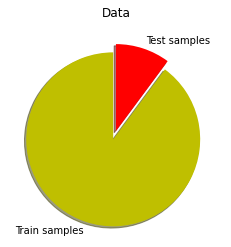

Traning Y sample size, or 100%: 296
Traning Y train sample size, or 90%: 266
Traning Y test sample size, or 10%: 30
Save directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/test_and_sample_data-char.png


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/test_and_sample_data-char.png'

In [240]:
fig, ax = plt.subplots()
labels = ["Train samples", "Test samples"]
sizes = [Y_train.count(), Y_test.count()]
colors = ["y", "r"]
explode = (0.1, 0)

ax.pie(sizes, labels = labels, colors = colors, explode = explode, shadow=True, startangle=90)
ax.set_title("Data")

plt.show()

print("Traning Y sample size, or 100%: {0}".format(len(Y_axis)))
print("Traning Y train sample size, or {0}%: {1}".format(x1, len(Y_train)))
print("Traning Y test sample size, or {0}%: {1}".format(x2, len(Y_test)))

print("Save directory: {0}/{1}/test_and_sample_data-char.png".format(solution_directory, "Bin"))
fig.savefig("{0}/{1}/test_and_sample_data-char.png".format(solution_directory, "Bin"))

In [241]:
n = 400 # кол-во решающих деревьев

In [242]:
xgbr = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = n)

In [243]:
# Show paramters of estimator
xgbr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [244]:
# train model
xgbr.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

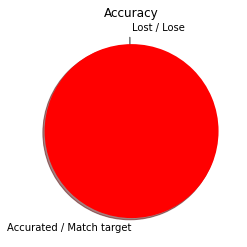

Traning score, accuracy: 99.9999787510162
Save directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/accuracy-char.png


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/char.png'

In [245]:
score = 100 * xgbr.score(X_train, Y_train)

fig, ax = plt.subplots()
labels = ["Accurated / Match target", "Lost / Lose"]
sizes = [score, 100 - score]
colors = ["red", "black"]
explode = (0, 0.1)

ax.pie(sizes, labels = labels, colors = colors, explode = explode, shadow=True, startangle=90)
ax.set_title("Accuracy")

plt.show()

print("Traning score, accuracy: {0}".format(score))

print("Save directory: {0}/{1}/accuracy-char.png".format(solution_directory, "Bin"))
fig.savefig("{0}/{1}/char.png".format(solution_directory, "Bin"))

In [246]:
#Y_predicted = xgbr.predict(Y_test)
#print("Predicted values (Y values): {0}".format(Y_predicted))
#print("Predicted test values (Y values): {0}".format(Y_test.values))

In [247]:
#for i, el in enumerate(Y_test.values):
    #print(estimator.predict(X_test)[i], el)

In [248]:
# show keys
#Y_test.keys()

In [249]:
# Select values dates by or access a group of rows and columns by label(s) date
dataset.loc[Y_test.keys(),'date']

250    2019-07-05
110    2016-06-15
161    2017-08-01
182    2017-12-28
27     2014-07-25
180    2017-12-15
175    2017-11-10
160    2017-07-28
114    2016-07-15
1      2013-12-25
213    2018-09-05
43     2014-12-05
272    2019-12-25
91     2016-01-28
93     2016-02-10
102    2016-04-15
44     2014-12-10
252    2019-07-25
245    2019-05-28
273    2020-01-10
79     2015-10-15
38     2014-10-15
166    2017-09-05
90     2016-01-20
157    2017-07-05
24     2014-07-01
72     2015-08-25
167    2017-09-15
217    2018-10-05
50     2015-02-10
Name: date, dtype: object

In [250]:
# Select dates columns
X_dates = dataset.loc[Y_test.keys(),'date'].values

In [251]:
# Display rows of dates
X_dates

array(['2019-07-05', '2016-06-15', '2017-08-01', '2017-12-28',
       '2014-07-25', '2017-12-15', '2017-11-10', '2017-07-28',
       '2016-07-15', '2013-12-25', '2018-09-05', '2014-12-05',
       '2019-12-25', '2016-01-28', '2016-02-10', '2016-04-15',
       '2014-12-10', '2019-07-25', '2019-05-28', '2020-01-10',
       '2015-10-15', '2014-10-15', '2017-09-05', '2016-01-20',
       '2017-07-05', '2014-07-01', '2015-08-25', '2017-09-15',
       '2018-10-05', '2015-02-10'], dtype=object)

In [252]:
#fig, ax = plt.subplots()
#plt.plot_date(X_dates, Y_test.values, color="b")
#plt.plot_date(X_dates, Y_predicted, color="y")
#ax.xaxis.set_tick_params(rotation=90, labelsize=10)
##plt.grid(True)
#plt.show()

#print("Predicted values (Y values): {0}".format(Y_predicted))
#print("Predicted test values (Y values): {0}".format(Y_test.values))

In [253]:
res_df = pd.DataFrame()

In [254]:
res_df = dataset.loc[Y_test.keys(),('date', 'rate')]

In [255]:
res_df

,date,rate
250,2019-07-05,7.50
110,2016-06-15,10.50
161,2017-08-01,9.00
182,2017-12-28,7.75
27,2014-07-25,7.50
180,2017-12-15,8.25
175,2017-11-10,8.25
160,2017-07-28,9.00
114,2016-07-15,10.50
1,2013-12-25,5.50


In [256]:
Y_test_rounded = [round(y, 2) for y in Y_test.values]
Y_predicted_rounded = [round(y, 2) for y in Y_predicted]

print("Test sample: {0}".format(Y_test_rounded))
print("Predicted values: {0}".format(Y_predicted_rounded))

Test sample: [7.5, 10.5, 9.0, 7.75, 7.5, 8.25, 8.25, 9.0, 10.5, 5.5, 7.25, 9.5, 6.25, 11.0, 11.0, 11.0, 9.5, 7.5, 7.75, 6.25, 11.0, 8.0, 9.0, 11.0, 9.0, 7.5, 11.0, 9.0, 7.5, 15.0]
Predicted values: [12.49, 11.46, 7.5, 9.25, 10.04, 7.74, 13.98, 14.98, 10.05, 4.32, 9.46, 5.48, 9.87, 10.05, 10.25, 7.73, 12.49, 14.6, 11.0, 10.88, 8.42, 9.77, 9.57, 7.74, 6.99, 10.01, 10.99, 6.29, 8.9, 6.6]


In [257]:
# Add to dateframe prediction column
res_df['prediction'] = Y_predicted_rounded

In [258]:
# Dispaly data frame
res_df

,date,rate,prediction
250,2019-07-05,7.50,12.49
110,2016-06-15,10.50,11.46
161,2017-08-01,9.00,7.50
182,2017-12-28,7.75,9.25
27,2014-07-25,7.50,10.04
180,2017-12-15,8.25,7.74
175,2017-11-10,8.25,13.98
160,2017-07-28,9.00,14.98
114,2016-07-15,10.50,10.05
1,2013-12-25,5.50,4.32


In [259]:
sorted_df = res_df.sort_values(by=['date'])

In [260]:
# Dispaly data frame
sorted_df

,date,rate,prediction
1,2013-12-25,5.50,4.32
24,2014-07-01,7.50,10.01
27,2014-07-25,7.50,10.04
38,2014-10-15,8.00,9.77
43,2014-12-05,9.50,5.48
44,2014-12-10,9.50,12.49
50,2015-02-10,15.00,6.60
72,2015-08-25,11.00,10.99
79,2015-10-15,11.00,8.42
90,2016-01-20,11.00,7.74


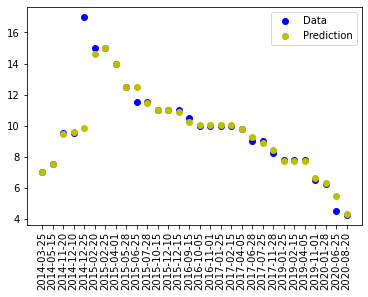

Date : 2020-08-20
Current rate : 4.25
Predicted rate : 4.320000171661377
Mean Squared Error (MSE): <function mean_squared_error at 0x7fb8d207dee0>
Root Mean Squared Error (RMSE): 1.33
Save directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/accuracy-char.png


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/prediction-char.png'

In [232]:
fig, ax = plt.subplots()
plt.plot_date(sorted_df['date'], sorted_df['rate'],  color="b")
plt.plot_date(sorted_df['date'], sorted_df['prediction'],  color="y")
plt.legend(["Data", "Prediction"])
#ax.stem(sorted_df['date'], sorted_df['prediction'])
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
#plt.grid(True)
#savefig('real and test sorted by date.png', bbox_inches='tight', dpi=600)
plt.show()

print("Date : {0}".format(sorted_df['date'].tail(1).values[0]))
print("Current rate : {0}".format(sorted_df['rate'].tail(1).values[0]))
print("Predicted rate : {0}".format(sorted_df['prediction'].tail(1).values[0]))
print("Mean Squared Error (MSE): {0}".format(mean_squared_error))
print("Root Mean Squared Error (RMSE): {0}".format(root_mean_squared_error))

print("Save directory: {0}/{1}/accuracy-char.png".format(solution_directory, "Bin"))
fig.savefig("{0}/{1}/prediction-char.png".format(solution_directory, "Bin"))

In [154]:
#X_axis.columns

In [155]:
#Y_test_rounded = [round(y, 2) for y in Y_test.values]
#Y_predicted_rounded = [round(y, 2) for y in Y_predicted]

#print("Test sample: {0}".format(Y_test_rounded))
#print("Predicted values: {0}".format(Y_predicted_rounded))

In [233]:
#  Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares i.e. 
# the average squared difference between the estimated values and true value. 
# Calculate mean Mean Squared Error (MSE)
#mean_squared_error = mean_squared_error(Y_test_rounded, Y_predicted_rounded)
mean_squared_error = round(np.square(np.subtract(Y_test_rounded,Y_predicted_rounded)).mean(), 2)
root_mean_squared_error = round(math.sqrt(mean_squared_error), 2)

Mean Squared Error (MSE): 1.77


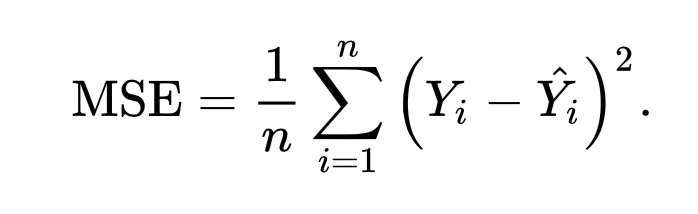

In [234]:
print("Mean Squared Error (MSE): {0}".format(mean_squared_error))
Image("{0}/{1}".format(image_directory, img_mse), width=256, height=128)

Root Mean Squared Error (RMSE): 1.33


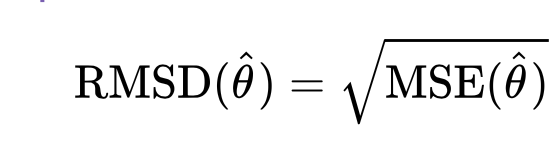

In [235]:
print("Root Mean Squared Error (RMSE): {0}".format(root_mean_squared_error))
Image("{0}/{1}".format(image_directory, img_rmse), width=256, height=128)

/var/folders/81/_6xsh3b55rb0rrn8x_j601wh0000gn/T/ipykernel_40513/3460987202.py:3: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  markerline, stemlines, baseline = plt.stem(sorted_df['date'], sorted_df['rate'], "b", markerfmt='o', label='Rate')
/var/folders/81/_6xsh3b55rb0rrn8x_j601wh0000gn/T/ipykernel_40513/3460987202.py:8: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  markerline, stemlines, baseline = plt.stem(sorted_df['date'], sorted_df['prediction'], "y", markerfmt='o', label='Prediction')


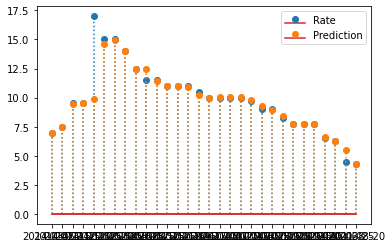

Date : 2020-08-20
Current rate : 4.25
Predicted rate : 4.320000171661377
Mean Squared Error (MSE): 1.77
Root Mean Squared Error (RMSE): 1.33
Save directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/accuracy-char.png


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/prediction-char.png'

In [236]:
fig, ax = plt.subplots()

markerline, stemlines, baseline = plt.stem(sorted_df['date'], sorted_df['rate'], "b", markerfmt='o', label='Rate')
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'dotted')


markerline, stemlines, baseline = plt.stem(sorted_df['date'], sorted_df['prediction'], "y", markerfmt='o', label='Prediction')
plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
plt.setp(stemlines, 'linestyle', 'dotted')

plt.legend()
plt.show()

print("Date : {0}".format(sorted_df['date'].tail(1).values[0]))
print("Current rate : {0}".format(sorted_df['rate'].tail(1).values[0]))
print("Predicted rate : {0}".format(sorted_df['prediction'].tail(1).values[0]))
print("Mean Squared Error (MSE): {0}".format(mean_squared_error))
print("Root Mean Squared Error (RMSE): {0}".format(root_mean_squared_error))

print("Save directory: {0}/{1}/accuracy-char.png".format(solution_directory, "Bin"))
fig.savefig("{0}/{1}/prediction-char.png".format(solution_directory, "Bin"))

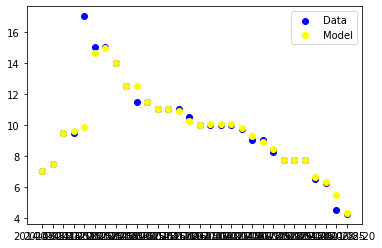

Date : 2020-08-20
Current rate : 4.25
Predicted rate : 4.320000171661377
Mean Squared Error (MSE): 1.77
Root Mean Squared Error (RMSE): 1.33
Save directory: /Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/model-char.png


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nikifovadim/Desktop/4. Projects 📁/Temp/KeyRatePrediction//Bin/model-char.png'

In [220]:
fig, ax = plt.subplots()

plt.scatter(sorted_df['date'], sorted_df['rate'], color="blue", label="Data")
plt.plot_date(sorted_df['date'], sorted_df['prediction'], color="yellow", label="Model")
plt.legend()
plt.show()

print("Date : {0}".format(sorted_df['date'].tail(1).values[0]))
print("Current rate : {0}".format(sorted_df['rate'].tail(1).values[0]))
print("Predicted rate : {0}".format(sorted_df['prediction'].tail(1).values[0]))
print("Mean Squared Error (MSE): {0}".format(mean_squared_error))
print("Root Mean Squared Error (RMSE): {0}".format(root_mean_squared_error))

print("Save directory: {0}/{1}/model-char.png".format(solution_directory, "Bin"))
fig.savefig("{0}/{1}/model-char.png".format(solution_directory, "Bin"))

## Ввести параметры в модель:

In [69]:
# x_param = { # (почти) последние данные
#     'eur_rub': [90],
#     'jpy_rub': [66.0841],
#     'idl_vol': [248.20],
#     'bas_dep': [67601533.0],
#     'req_res': [671.3],
#     'act_bal': [2699.5],
#     'org_num': [429.0],
#     'rep_vol': [100000.0],
#     'sal_vol': [127.2],
#     'res_gol': [126084.0],
#     'kop_dep': [909358.64],
#     'res_res': [566012.0]
# }

In [151]:
x_param = { # выбранные параметры стресс-сценария
    'eur_rub': [90],
    'jpy_rub': [72],
    'idl_vol': [200],
    'bas_dep': [50000000.0],
    'req_res': [350],
    'act_bal': [2500],
    'org_num': [400],
    'rep_vol': [100000.0],
    'sal_vol': [-500],
    'res_gol': [80000],
    'kop_dep': [300000],
    'res_res': [400000]
}

In [147]:
# x_param = { # выбранные параметры стресс-сценария
#     'eur_rub': [87.9030],
#     'jpy_rub': [70.3288],
#     'idl_vol': [177.42],
#     'bas_dep': [68676951.0],
#     'req_res': [659.2],
#     'act_bal': [2631.700000],
#     'org_num': [419.0],
#     'rep_vol': [5124.0],
#     'sal_vol': [144.9],
#     'res_gol': [144322.0],
#     'kop_dep': [1817985.90],
#     'res_res': [591753.0]
# }

In [152]:
#test_df = pd.DataFrame.from_dict(x_param,  orient='columns', dtype='float')

In [153]:
#test_df

,eur_rub,jpy_rub,idl_vol,bas_dep,req_res,act_bal,org_num,rep_vol,sal_vol,res_gol,kop_dep,res_res
0,90.0,72.0,200.0,50000000.0,350.0,2500.0,400.0,100000.0,-500.0,80000.0,300000.0,400000.0


In [154]:
#estimator.predict(test_df)

array([9.222826], dtype=float32)

1. Хвост-собака
2. Без ручного управления ставка 7-7.50
3. Рассмотреть глобально негативный сценарий - обрушение курса валют, уменьшение золотого запаса, отрицательное сальдо баланса, высокий корпоративный долг, падение депозитов

1. Временные ряды (многомерный случай) - рассмотреть задачу forecast'а вместо задачи регрессии
2. Resuduals - остатки на нормальное распределение, тесты

In [123]:
#residuals = Y_test - Y_predicted

In [124]:
#residuals.mean()

0.03837575912475586

In [125]:
#residuals.var()

0.04227992126218072